## Midfielder analysis

All players listed as MF in Europes top 5 leagues

In [110]:
#Import necessary packages

import pandas as pd
import numpy as np
from numpy import linalg
import requests
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
import math
from mplsoccer import PyPizza, FontManager
import matplotlib.font_manager as fm
import PIL
import urllib
from matplotlib import font_manager

In [90]:
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Cambria'.lower() in fontpath.lower():
        print(fontpath)

C:\Windows\Fonts\cambria.ttc
C:\Windows\Fonts\cambriaz.ttf
C:\Windows\Fonts\cambriab.ttf
C:\Windows\Fonts\cambriai.ttf


In [2]:
#Import dataset

df = pd.read_csv('C:/Users/user/OneDrive/Documents/football_articles/Midfielders/midfielders_python_use.csv')

#Remove blank terms and non-midfielders
    

df = df.drop(786)
df


,Player,Age,Nation,Team,Comp,npxG,xAG,Shot creating actions,Passes into PA,Final 3rd carries,...,Progressive carries,Ball retention,Switches,Interceptons,Aerials won,Ball recoveries,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Position
0,Deniz Undav,27,de GER,Stuttgart,de Bundesliga,0.7,0.3,4.2,1.5,1.6,...,63.7,0.88,0.2,0.3,0.9,2.8,0.3,0.4,0.5,FWMF
1,Luis Javier Suárez,25,co COL,Almería,es La Liga,0.6,0.1,2.5,0.3,1.3,...,71.8,0.89,0.1,0.0,1.0,2.1,0.3,0.4,0.0,FWMF
2,Ansu Fati,20,es ESP,2 Teams,2 Comps,0.7,0.1,3.6,1.0,1.0,...,93.6,0.92,0.2,0.5,0.3,3.8,0.2,0.3,0.2,MFFW
3,Dion Moise Sahi,21,ci CIV,Strasbourg,fr Ligue 1,0.7,0.2,1.8,0.9,1.5,...,79.0,0.9,0.0,0.2,0.7,3.1,0.2,0.4,0.2,MFFW
4,Ángel Correa,28,ar ARG,Atlético Madrid,es La Liga,0.5,0.2,4.3,1.4,1.2,...,69.7,0.89,0.2,0.1,0.4,4.5,0.3,0.4,0.6,FWMF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,Fernando,36,br BRA,Sevilla,es La Liga,0.0,0.1,1.6,1.0,1.6,...,84.1,0.97,0.6,1.4,2.0,6.9,0.4,0.8,0.6,MF
782,Rani Khedira,29,de GER,Union Berlin,de Bundesliga,0.0,0.0,0.6,0.3,0.3,...,21.4,0.97,0.1,1.7,1.3,5.6,1.0,1.3,0.0,MF
783,Adrià Altimira,22,es ESP,Villarreal,es La Liga,0.0,0.0,0.7,0.6,0.7,...,74.8,0.98,0.1,0.6,0.2,4.9,1.0,0.7,0.1,DFMF
784,Francis Coquelin,32,fr FRA,Villarreal,es La Liga,0.0,0.0,1.5,0.7,1.0,...,43.1,0.97,0.4,2.1,1.3,4.9,0.3,1.0,0.1,MF


In [3]:
df1 = df
columns_to_calculate = df1.columns.values.tolist()
columns_to_calculate = columns_to_calculate[5:21]
columns_to_calculate

['npxG',
 'xAG',
 'Shot creating actions',
 'Passes into PA',
 'Final 3rd carries',
 'Link-up play volume',
 'Progressive passing',
 'Progressive carries',
 'Ball retention',
 'Switches',
 'Interceptons',
 'Aerials won',
 'Ball recoveries',
 'Tackles Def 3rd',
 'Tackles Mid 3rd',
 'Tackles Att 3rd']

In [4]:

for columns in columns_to_calculate:
    percentile_table = []

    for index, column in df1.iterrows():
        value = column[columns]
        percentile_score = stats.percentileofscore(df1[columns],value)
        percentile_table.append(percentile_score)

    df1[columns] = percentile_table
    
    df1

df1 = df1.round()
print(df1)

                 Player  Age  Nation             Team           Comp   npxG  \
0           Deniz Undav   27  de GER        Stuttgart  de Bundesliga  100.0   
1    Luis Javier Suárez   25  co COL          Almería     es La Liga   99.0   
2             Ansu Fati   20  es ESP          2 Teams        2 Comps  100.0   
3       Dion Moise Sahi   21  ci CIV       Strasbourg     fr Ligue 1  100.0   
4          Ángel Correa   28  ar ARG  Atlético Madrid     es La Liga   98.0   
..                  ...  ...     ...              ...            ...    ...   
781            Fernando   36  br BRA          Sevilla     es La Liga   11.0   
782        Rani Khedira   29  de GER     Union Berlin  de Bundesliga   11.0   
783      Adrià Altimira   22  es ESP       Villarreal     es La Liga   11.0   
784    Francis Coquelin   32  fr FRA       Villarreal     es La Liga   11.0   
785   Boubakary Soumaré   24  fr FRA          Sevilla     es La Liga   11.0   

      xAG  Shot creating actions  Passes into PA  F

In [5]:
df1.to_csv('C:/Users/user/OneDrive/Documents/football_articles/df1.csv')
df1

,Player,Age,Nation,Team,Comp,npxG,xAG,Shot creating actions,Passes into PA,Final 3rd carries,...,Progressive carries,Ball retention,Switches,Interceptons,Aerials won,Ball recoveries,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Position
0,Deniz Undav,27,de GER,Stuttgart,de Bundesliga,100.0,95.0,88.0,83.0,55.0,...,28.0,8.0,47.0,14.0,56.0,3.0,18.0,17.0,89.0,FWMF
1,Luis Javier Suárez,25,co COL,Almería,es La Liga,99.0,47.0,44.0,10.0,39.0,...,39.0,11.0,28.0,1.0,61.0,0.0,18.0,17.0,5.0,FWMF
2,Ansu Fati,20,es ESP,2 Teams,2 Comps,100.0,47.0,78.0,60.0,27.0,...,65.0,26.0,47.0,32.0,13.0,17.0,9.0,9.0,38.0,MFFW
3,Dion Moise Sahi,21,ci CIV,Strasbourg,fr Ligue 1,100.0,81.0,21.0,53.0,50.0,...,47.0,15.0,9.0,8.0,42.0,5.0,9.0,17.0,38.0,MFFW
4,Ángel Correa,28,ar ARG,Atlético Madrid,es La Liga,98.0,81.0,90.0,80.0,35.0,...,36.0,11.0,47.0,4.0,21.0,30.0,18.0,17.0,94.0,FWMF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,Fernando,36,br BRA,Sevilla,es La Liga,11.0,47.0,15.0,60.0,55.0,...,53.0,76.0,85.0,89.0,91.0,88.0,26.0,55.0,94.0,MF
782,Rani Khedira,29,de GER,Union Berlin,de Bundesliga,11.0,12.0,1.0,10.0,1.0,...,1.0,76.0,28.0,95.0,73.0,63.0,77.0,89.0,5.0,MF
783,Adrià Altimira,22,es ESP,Villarreal,es La Liga,11.0,12.0,1.0,32.0,13.0,...,43.0,90.0,28.0,42.0,8.0,41.0,77.0,45.0,19.0,DFMF
784,Francis Coquelin,32,fr FRA,Villarreal,es La Liga,11.0,12.0,13.0,39.0,27.0,...,9.0,76.0,72.0,99.0,73.0,41.0,18.0,71.0,19.0,MF


In [6]:
params = df1.columns[5:21].tolist()
params

['npxG',
 'xAG',
 'Shot creating actions',
 'Passes into PA',
 'Final 3rd carries',
 'Link-up play volume',
 'Progressive passing',
 'Progressive carries',
 'Ball retention',
 'Switches',
 'Interceptons',
 'Aerials won',
 'Ball recoveries',
 'Tackles Def 3rd',
 'Tackles Mid 3rd',
 'Tackles Att 3rd']

In [122]:
#Generate graphs

params = df1.columns[5:21].tolist()

def player_graph(x):

    filtered_df = df1[df1['Player'] == x]
    values_player = filtered_df.iloc[0,5:21]
    numeric_values = pd.to_numeric(values_player,downcast='integer', errors='coerce')
    

    font_normal = fm.FontProperties(fname=r'C:\Windows\Fonts\cambriaz.ttf')
    font_italic = fm.FontProperties(fname=r'C:\Windows\Fonts\cambriai.ttf')
    font_bold = fm.FontProperties(fname=r'C:\Windows\Fonts\cambriab.ttf')

    slice_colors = ["#1A78CF"] * 5 + ["#279b37"] * 5 + ["#ff4500"] * 6
    text_colors = ["#000000"] * 10 + ["#000000"] * 6


    baker = PyPizza(
        params=params,                  # list of parameters
        background_color="#ffece6",     # background color
        straight_line_color="#EBEBE9",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_color="#EBEBE9",
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        inner_circle_size=20,           # size of inner circle
    )

#f2f2f2

    fig1, ax = baker.make_pizza(
        numeric_values,                          # list of values
        figsize=(8, 8.5),                # adjust figsize according to your need
        color_blank_space="same",        # use same color to fill blank space
        slice_colors=slice_colors,       # color for individual slices
        value_colors=text_colors,        # color for the value-text
        value_bck_colors=slice_colors,   # color for the blank spaces
        blank_alpha=0.4,                 # alpha for blank-space colors
        kwargs_slices=dict(
            edgecolor="#FFFFFF", zorder=2, linewidth=1
        ),                               # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=8,
            fontproperties=font_normal, va="center"
        ),                               # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=11,
            fontproperties=font_normal, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        ) 
    )
    #Title
    fig1.text(
        0.515, 0.975, x, size=16,
        ha="center", color="#000000", fontproperties=font_normal,
    )

    #Subtitle
    fig1.text(
        0.515, 0.950,
        "per90 Percentile Rank vs Midfielders",
        size=13,
        ha="center",  color="#000000", fontproperties=font_normal,
    )

    fig1.text(
        0.515, 0.925,
        "Season 2023-24",
        size=13,
        ha="center",  color="#000000", fontproperties=font_normal,
    )


    #Credits
    CREDIT_1 = "data: statsbomb viz fbref"
    
    fig1.text(
        0.99, 0.02, f"{CREDIT_1}", size=9,
        color="#000000",
        ha="right"
    )

    # add text
    fig1.text(
        0.79, 0.08, "Attacking\nPossession\nDefending", size=11,
        color="#000000",
        ha="left", fontproperties=font_normal,
    )

    #0.34 0.925

    # add rectangles
    fig1.patches.extend([
        plt.Rectangle(
            (0.90, 0.12), 0.012, 0.012, fill=True, color="#1a78cf",
            transform=fig1.transFigure, figure=fig1
        ),
        plt.Rectangle(
            (0.90, 0.10), 0.012, 0.012, fill=True, color="#279b37",
            transform=fig1.transFigure, figure=fig1
        ),
        plt.Rectangle(
            (0.90, 0.08), 0.012, 0.012, fill=True, color="#d70232",
            transform=fig1.transFigure, figure=fig1
        ),
    ])

    fig1.savefig('C:/Users/user/OneDrive/Documents/football_articles/player_figure.png')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\py_pizza.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, temp_values[i], value, ha="center", **kwargs_values


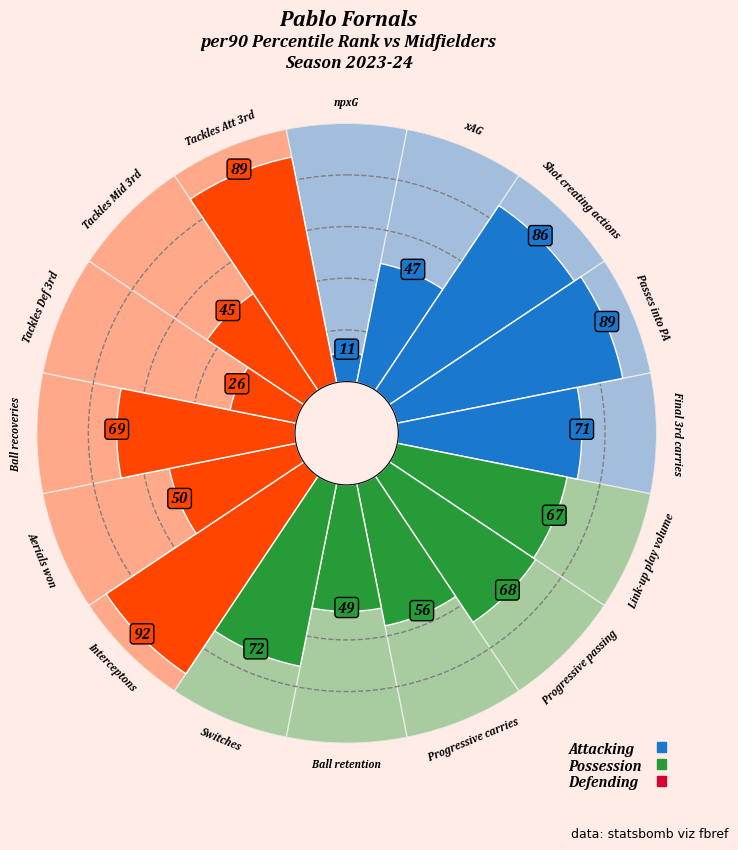

In [121]:
player_graph('Pablo Fornals')



In [9]:
df[df['Player'] == 'Raphaël Guerreiro']

,Player,Age,Nation,Team,Comp,npxG,xAG,Shot creating actions,Passes into PA,Final 3rd carries,...,Progressive carries,Ball retention,Switches,Interceptons,Aerials won,Ball recoveries,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Position
416,Raphaël Guerreiro,29,pt POR,Bayern Munich,de Bundesliga,43.638677,46.692112,77.735369,94.465649,89.503817,...,94.720102,90.267176,8.715013,80.597964,7.506361,30.470738,35.62341,45.038168,79.198473,DFMF


In [10]:
Rice_data = df1[df1['Player'] == 'Declan Rice'].iloc[:,5:21].values

players_data = df1[df1['Player'] != 'Declan Rice'].iloc[:,5:21].values

Euclidean_distance = np.linalg.norm(players_data - Rice_data, axis = 1)
Euclidean_distance

similarity_df = pd.DataFrame({
    'Player': df[df['Player'] != 'Declan Rice']['Player'],  # Exclude 'Jorginho' from player names
    'SimilarityScore': Euclidean_distance
})

similarity_df = similarity_df.sort_values(by='SimilarityScore')


print(similarity_df.head(10))

                  Player  SimilarityScore
565     Valentin Rongier        54.470175
376  Roberto Gagliardini        67.882251
495          Oriol Romeu        68.220232
422      Bryan Cristante        71.435285
254       Matteo Pessina        71.498252
547     William Carvalho        72.532751
335  Aleksandar Pavlovic        74.966659
716          Yacine Adli        76.843998
779      Boubacar Kamara        80.616376
113       Enzo Fernández        82.255699
